In [66]:
import requests 
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

import lmoments3 as lm
from lmoments3 import stats, distr

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
ds = xr.open_dataset("./data/ERA5-WRF_45km_monthly.nc")
ds

<xarray.Dataset>
Dimensions:            (time: 852, y: 104, x: 109)
Coordinates:
  * time               (time) datetime64[ns] 1950-09-01 ... 2021-08-01
    Lambert_Conformal  int32 ...
    lakemask           (y, x) float32 ...
    landmask           (y, x) float32 ...
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
  * x                  (x) float64 -6.285e+06 -6.24e+06 ... -1.47e+06 -1.425e+06
  * y                  (y) float64 -1.126e+06 -1.081e+06 ... 3.464e+06 3.509e+06
Data variables:
    T2                 (time, y, x) float32 ...

In [23]:
ds['T2'].data = (ds['T2'].data - 273.15) * (9/5) + 32
ds['T2'].attrs['units'] = 'F'

In [24]:
da = ds['T2']

In [28]:
ams = ds.groupby('time.year').max('time')

array([[[77.543655, 77.61831 , 77.71971 , ..., 80.92734 , 80.97024 ,
         80.943436],
        [77.627045, 77.98196 , 78.1145  , ..., 80.98804 , 81.03506 ,
         80.9821  ],
        [77.689224, 78.025955, 78.15741 , ..., 81.02528 , 80.96205 ,
         80.9603  ],
        ...,
        [72.69836 , 72.37261 , 71.852295, ..., 34.504112, 33.401417,
         32.990803],
        [72.4978  , 72.08252 , 71.496124, ..., 33.428387, 33.43745 ,
         32.302013],
        [72.18596 , 71.67256 , 71.06831 , ..., 32.814747, 32.442528,
         32.291576]],

       [[79.8125  , 79.8649  , 79.92642 , ..., 83.31703 , 83.276764,
         83.260284],
        [79.9429  , 80.275024, 80.25151 , ..., 83.61151 , 83.5328  ,
         83.306046],
        [79.99196 , 80.381096, 80.3667  , ..., 83.824814, 83.66084 ,
         83.420074],
        ...,
        [73.28415 , 73.32842 , 73.26108 , ..., 52.18573 , 51.628174,
         50.645885],
        [73.27821 , 73.22125 , 73.076675, ..., 51.326874, 51.04057 ,
   

In [50]:
lat = 37.87
lon = 122.27
ams_berk = ams.sel(x=lon, y=lat, method='nearest')

In [51]:
paras_gev = distr.gev.lmom_fit(ams_berk.T2.values)
paras_gum = distr.gum.lmom_fit(ams_berk.T2.values)
paras_wei = distr.wei.lmom_fit(ams_berk.T2.values)
paras_gam = distr.gam.lmom_fit(ams_berk.T2.values)
paras_gpa = distr.gpa.lmom_fit(ams_berk.T2.values)
paras_exp = distr.exp.lmom_fit(ams_berk.T2.values)
paras_glo = distr.glo.lmom_fit(ams_berk.T2.values)
paras_pe3 = distr.pe3.lmom_fit(ams_berk.T2.values)

In [54]:
print('gev AICc:', stats.AICc(ams_berk.T2.values, 'gev', paras_gev))
print('gum AICc:', stats.AICc(ams_berk.T2.values, 'gum', paras_gum))
print('wei AICc:', stats.AICc(ams_berk.T2.values, 'wei', paras_wei))
print('gam AICc:', stats.AICc(ams_berk.T2.values, 'gam', paras_gam))
print('gpa AICc:', stats.AICc(ams_berk.T2.values, 'gpa', paras_gpa))
print('exp AICc:', stats.AICc(ams_berk.T2.values, 'exp', paras_exp))
print('glo AICc:', stats.AICc(ams_berk.T2.values, 'glo', paras_glo))
print('pe3 AICc:', stats.AICc(ams_berk.T2.values, 'pe3', paras_pe3))

gev AICc: 342.0448279320774
gum AICc: 893.2293099723972
wei AICc: inf
gam AICc: 338.0114198395698
gpa AICc: inf
exp AICc: inf
glo AICc: 325.4911621402165
pe3 AICc: 333.19394388427787


In [59]:
fitted_glo = distr.glo(**paras_glo)

return_years = [2,5,10,20,50,100,200,500,1000]
return_periods = np.empty(len(return_years))

for i in range(len(return_years)):
    return_periods[i] = 1.0-(1.0/return_years[i])

glo_return_periods = fitted_glo.ppf(return_periods)

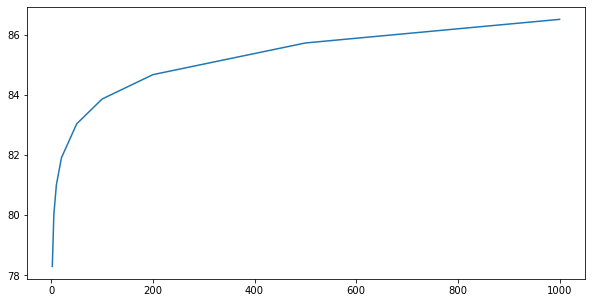

In [67]:
plt.figure(figsize=[10,5]) 
plt.plot(return_years, glo_return_periods)

plt.show()